# [DAY18] - 23.11.20 MY SQL실습 
## : Lev.1 -  [조건에 부합하는 중고거래 댓글 조회하기](https://school.programmers.co.kr/learn/courses/30/lessons/164673)

**TABLES**

중고거래 게시판 정보를 담은 테이블
>**USED_GOODS_BOARD**
>
>- BOARD_ID : 게시글 ID
>- WRITER_ID : 작성자 ID
>- TITLE : 게시글 제목
>- CONTENTS : 게시글 내용
>- PRICE : 가격
>- CREATED_DATE : 작성일
>- STATUS : 거래상태
>- VIEWS : 조회수

중고거래 게시판 첨부파일 정보를 담은 테이블
>**USED_GOODS_REPLY**
>
>- REPLY_ID : 댓글 ID
>- BOARD_ID : 게시글 ID
>- WRITER_ID : 작성자 ID
>- CONTENTS : 댓글 내용
>- CREATED_DATE 작성일

**문제**

>USED_GOODS_BOARD와 USED_GOODS_REPLY 테이블에서 **2022년 10월에 작성**된 게시글 제목, **게시글 ID, 댓글 ID, 댓글 작성자 ID, 댓글 내용, 댓글 작성일을 조회하는 SQL문을 작성**해주세요.
결과는 **댓글 작성일을 기준으로 오름차순 정렬**해주시고,
**댓글 작성일이 같다면 게시글 제목을 기준으로 오름차순 정렬**해주세요.

## **1차 나의 명령문**

In [4]:
'''SQL
SELECT
USED_GOODS_BOARD.TITLE,
USED_GOODS_BOARD.BOARD_ID,
USED_GOODS_REPLY.REPLY_ID,
USED_GOODS_REPLY.WRITER_ID,
USED_GOODS_REPLY.CONTENTS,
DATE_FORMAT(USED_GOODS_BOARD.CREATED_DATE, '%Y-%m-%d') AS CREATED_DATE
FROM
USED_GOODS_BOARD
LEFT OUTER JOIN
USED_GOODS_REPLY
ON
DATE(USED_GOODS_BOARD.CREATED_DATE) = DATE(USED_GOODS_REPLY.CREATED_DATE)
WHERE
DATE(USED_GOODS_BOARD.CREATED_DATE) LIKE '2022-10%'
ORDER BY
CREATED_DATE ASC, USED_GOODS_BOARD.TITLE ASC;
'''

"SQL\nSELECT\nUSED_GOODS_BOARD.TITLE,\nUSED_GOODS_BOARD.BOARD_ID,\nUSED_GOODS_REPLY.REPLY_ID,\nUSED_GOODS_REPLY.WRITER_ID,\nUSED_GOODS_REPLY.CONTENTS,\nDATE_FORMAT(USED_GOODS_BOARD.CREATED_DATE, '%Y-%m-%d') AS CREATED_DATE\nFROM\nUSED_GOODS_BOARD\nLEFT OUTER JOIN\nUSED_GOODS_REPLY\nON\nDATE(USED_GOODS_BOARD.CREATED_DATE) = DATE(USED_GOODS_REPLY.CREATED_DATE)\nWHERE\nDATE(USED_GOODS_BOARD.CREATED_DATE) LIKE '2022-10%'\nORDER BY\nCREATED_DATE ASC, USED_GOODS_BOARD.TITLE ASC;\n"

**결과**
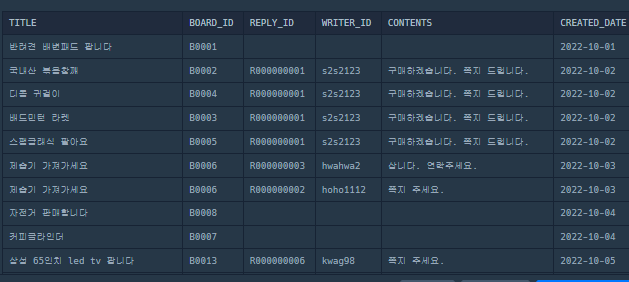
- 목록은 모두 포함 되었으나, 내용이 상이하다.
다시 해보자

## **2차 나의 명령문**

In [5]:
'''sql
SELECT
USED_GOODS_BOARD.TITLE,
USED_GOODS_BOARD.BOARD_ID,
USED_GOODS_REPLY.REPLY_ID,
USED_GOODS_REPLY.WRITER_ID,
USED_GOODS_REPLY.CONTENTS,
DATE_FORMAT(USED_GOODS_BOARD.CREATED_DATE, '%Y-%m-%d') AS CREATED_DATE
FROM
USED_GOODS_BOARD
INNER JOIN
USED_GOODS_REPLY
ON
DATE(USED_GOODS_BOARD.CREATED_DATE) = DATE(USED_GOODS_REPLY.CREATED_DATE)
WHERE
DATE(USED_GOODS_BOARD.CREATED_DATE) LIKE '2022-10%'
ORDER BY
CREATED_DATE ASC, USED_GOODS_BOARD.TITLE ASC;
'''

"sql\nSELECT\nUSED_GOODS_BOARD.TITLE,\nUSED_GOODS_BOARD.BOARD_ID,\nUSED_GOODS_REPLY.REPLY_ID,\nUSED_GOODS_REPLY.WRITER_ID,\nUSED_GOODS_REPLY.CONTENTS,\nDATE_FORMAT(USED_GOODS_BOARD.CREATED_DATE, '%Y-%m-%d') AS CREATED_DATE\nFROM\nUSED_GOODS_BOARD\ninner JOIN\nUSED_GOODS_REPLY\nON\nDATE(USED_GOODS_BOARD.CREATED_DATE) = DATE(USED_GOODS_REPLY.CREATED_DATE)\nWHERE\nDATE(USED_GOODS_BOARD.CREATED_DATE) LIKE '2022-10%'\nORDER BY\nCREATED_DATE ASC, USED_GOODS_BOARD.TITLE ASC;\n"

**결과**
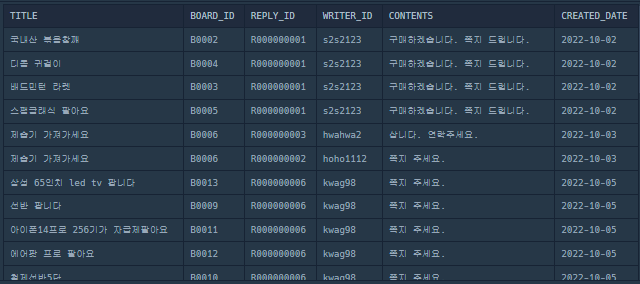
- 비어있는 댓글 내용이 있는게 문제인가 싶었지만 아닌가보다

## **3차 나의 명령문**

예시 답안을 보고 다시 생각해보자.
1. 작성일에서 as를 굳이 쓸 필요 없이 USED_GOODS_REPLY의 정보를 가져와보자
2. 댓글 내용의 공란이 없도록 'INNER JOIN'을 활용하는 것은 맞는 것 같다.
3. ON의 기준을 날짜가 아닌 ID로 잡자 

In [6]:
'''sql
SELECT
USED_GOODS_BOARD.TITLE,
USED_GOODS_BOARD.BOARD_ID,
USED_GOODS_REPLY.REPLY_ID,
USED_GOODS_REPLY.WRITER_ID,
USED_GOODS_REPLY.CONTENTS,
DATE_FORMAT(USED_GOODS_REPLY.CREATED_DATE, '%Y-%m-%d')
FROM
USED_GOODS_BOARD
inner JOIN
USED_GOODS_REPLY
ON
USED_GOODS_BOARD.BOARD_ID = USED_GOODS_REPLY.BOARD_ID
WHERE
USED_GOODS_BOARD.CREATED_DATE LIKE '2022-10%'
ORDER BY
USED_GOODS_REPLY.CREATED_DATE ASC, USED_GOODS_BOARD.TITLE ASC;
'''

"sql\nSELECT\nUSED_GOODS_BOARD.TITLE,\nUSED_GOODS_BOARD.BOARD_ID,\nUSED_GOODS_REPLY.REPLY_ID,\nUSED_GOODS_REPLY.WRITER_ID,\nUSED_GOODS_REPLY.CONTENTS,\nDATE_FORMAT(USED_GOODS_REPLY.CREATED_DATE, '%Y-%m-%d')\nFROM\nUSED_GOODS_BOARD\ninner JOIN\nUSED_GOODS_REPLY\nON\nUSED_GOODS_BOARD.BOARD_ID = USED_GOODS_REPLY.BOARD_ID\nWHERE\nUSED_GOODS_BOARD.CREATED_DATE LIKE '2022-10%'\nORDER BY\nUSED_GOODS_REPLY.CREATED_DATE ASC, USED_GOODS_BOARD.TITLE ASC;\n"

**결과**
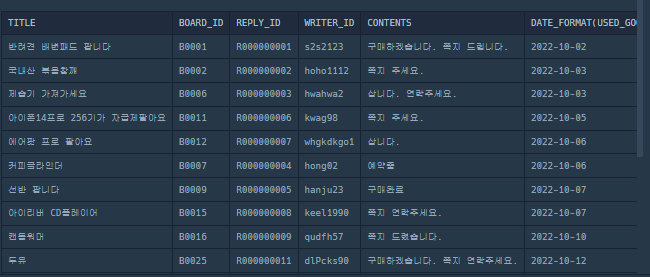
- 정확하게 나왔다!!!

## 요약

- 명령문을 넣기 전 구조를 산출하려는 구조를 명확하게 이해하자.
- 어떠한 목록을 표기할지 뿐만이 아닌 각 TABELS가 가지고 있는 DATA의 상관관계를 먼저 이해하는 것이 중요함!